Student name: Nicholas Murphy
Student ID: 21268819

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 10]



# bank.csv

## Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed

## Attribute Information:

## Input variables:
### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 
then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### **Output variable (desired target):**

16 - y - has the client subscribed a term deposit? (binary: 'yes','no')

The primary focus of the marketing campaign was to get people to subscribe, so the most useful analysis would be to see what patterns lead to a successful subscription. 

However, this data is useful to the bank outside of the marketing campaign, so we can ask other questions not directly related to the campaign or its outcome. Data such as this can be used to build all types of predictive models.

---
## Task 2: 
* Formulate a particular question that might be interesting to answer by exploring this dataset (approx. 50 words in a markdown cell). - done

* Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell). - done

* Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell). - done

* Generate two plots with the combined distribution of attributes and draw conclusions from them (approx. 150 words in a markdown cell).

* Make sure your conclusions are related to the question you have formulated.

## My question:

Given the data at hand, who would it be best to target the marketing campaign towards to get the best outcome?

## Calculate statistics for the numerical and categorical attributes

In [3]:
df = pd.read_csv('./bank.csv')
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [4]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [6]:
desc = df.describe()
desc

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

## Identify columns with missing values

In [7]:
def missing_values(desc):
    num_columns = df.shape[0]
    for (columnName, columnData) in desc.iteritems():
        non_null_data = columnData.dropna().shape[0]
        if (num_columns != non_null_data):
            print ("{col} has ({expected}-{actual:.0f}) {missing:.0f} missing values"
            .format(col=columnName, expected=num_columns, actual=non_null_data,missing=abs(num_columns-non_null_data)))

missing_values(df)

age has (2000-1988) 12 missing values
job has (2000-1990) 10 missing values
education has (2000-1896) 104 missing values
contact has (2000-1809) 191 missing values
poutcome has (2000-1546) 454 missing values


## Look for any correlations between the columns

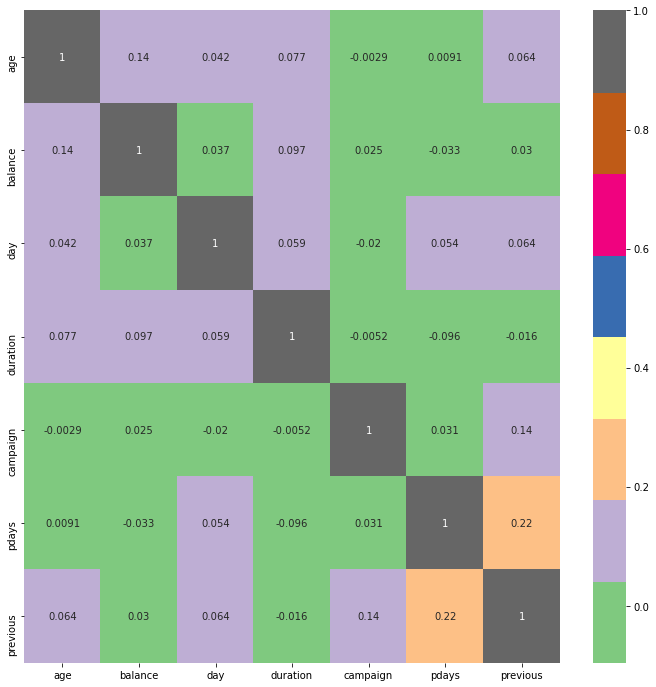

In [52]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap="Accent",annot=True);

Right off the bat, its clear that there is no sets of columnar data that correlate with each other, unlike the loans_train dataset. The best correlation is between pdays - the number of days since last contacted, and previous, the number of previous contacts. 

Below I use a scatter or regplot to see if any useful pattern can be gleaned, but as with the heatmap any correlation is to small to be meaningful.

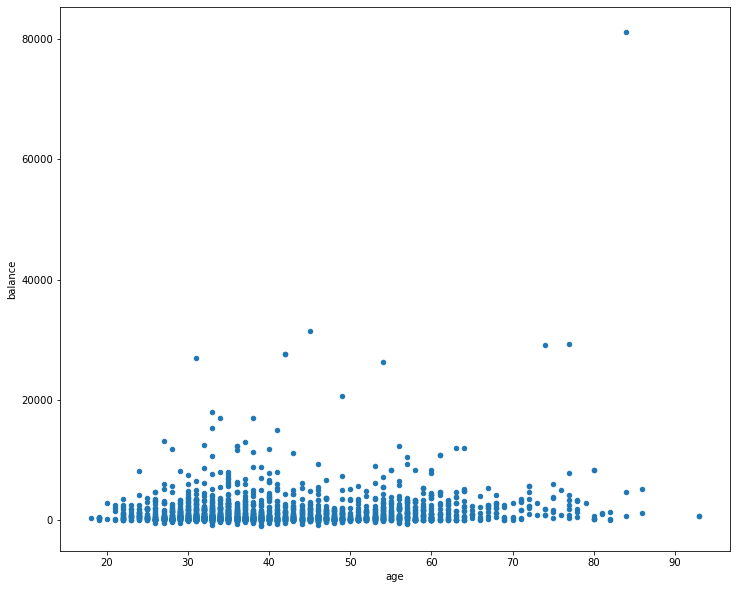

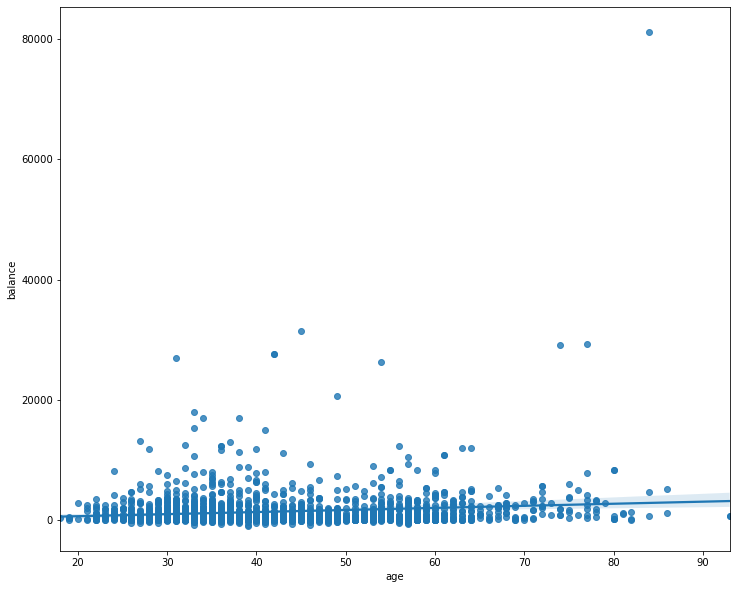

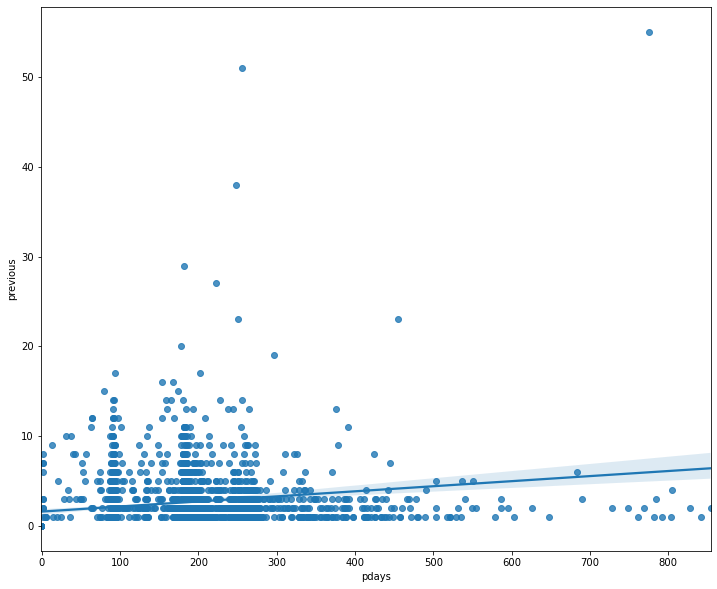

In [71]:
df.plot.scatter(x='age', y='balance')
plt.show()
sns.regplot(data=df, x='age', y='balance')
plt.show()
sns.regplot(data=df, x='pdays', y='previous')
plt.show()

### use histograms to display the breakdown of data in each column. This will cover both numerical and categorical data.

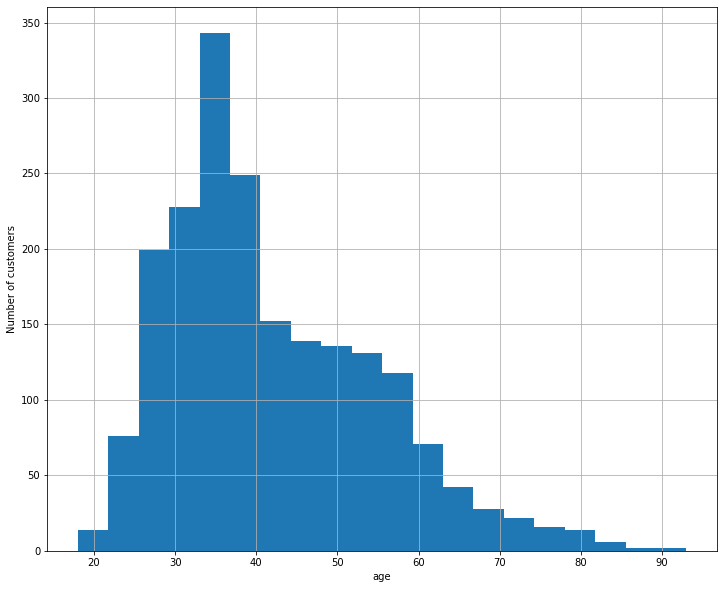

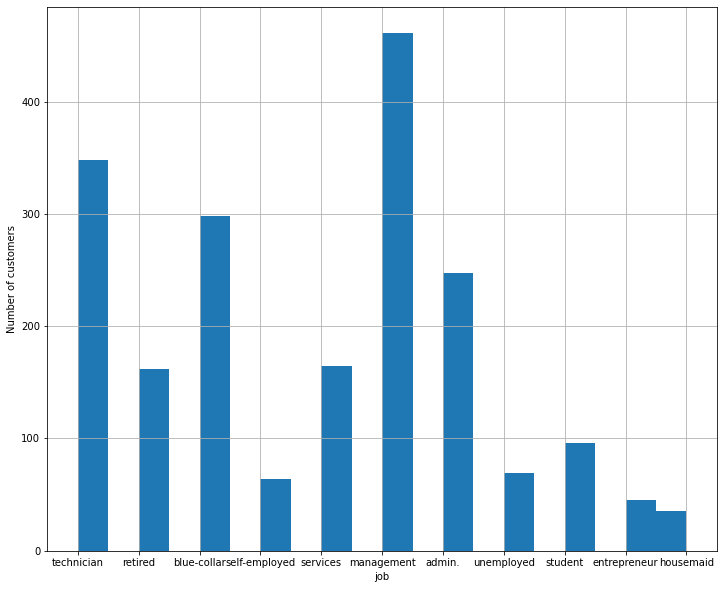

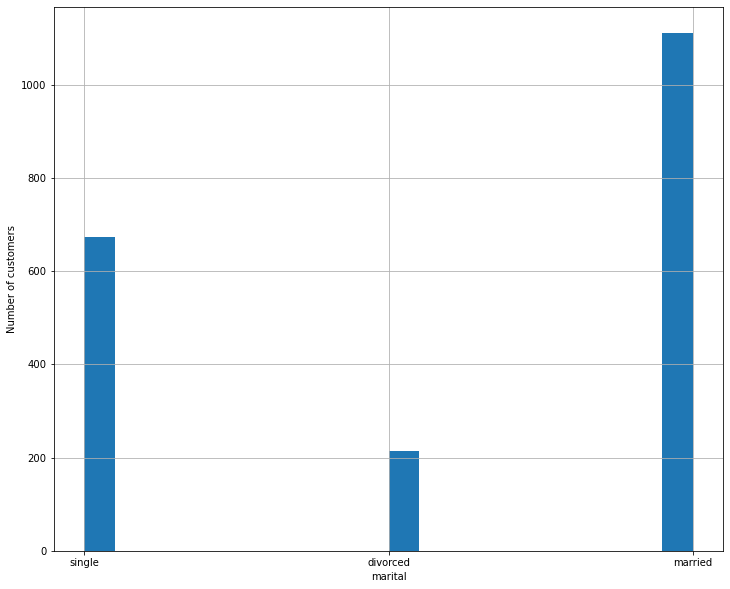

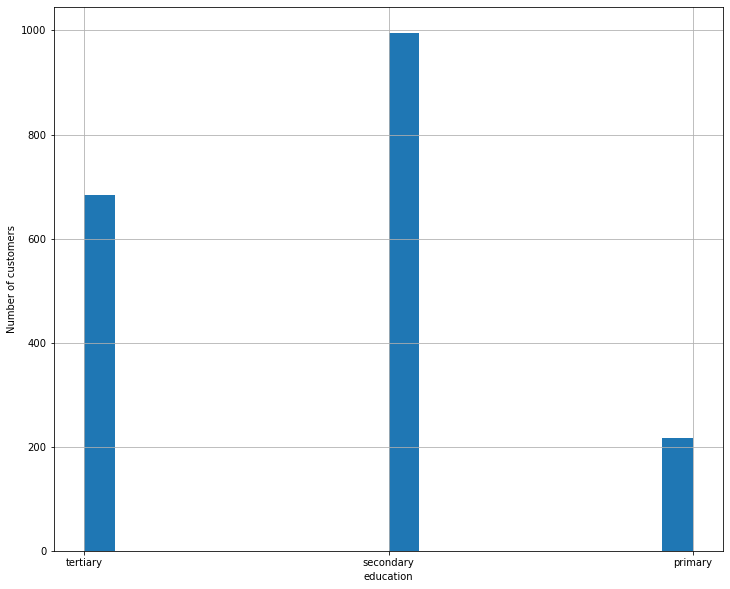

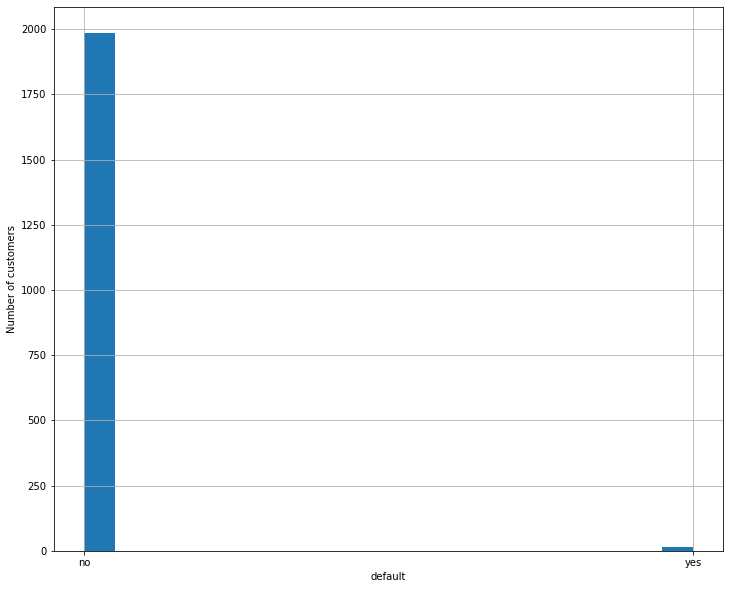

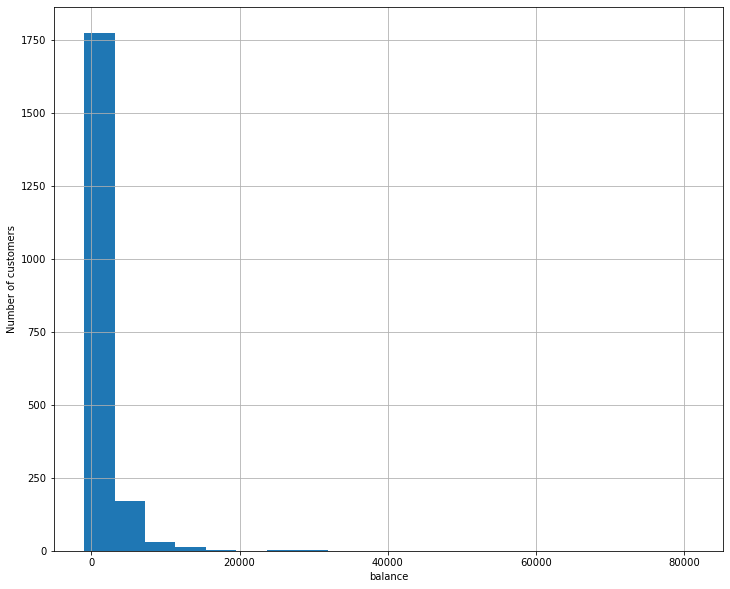

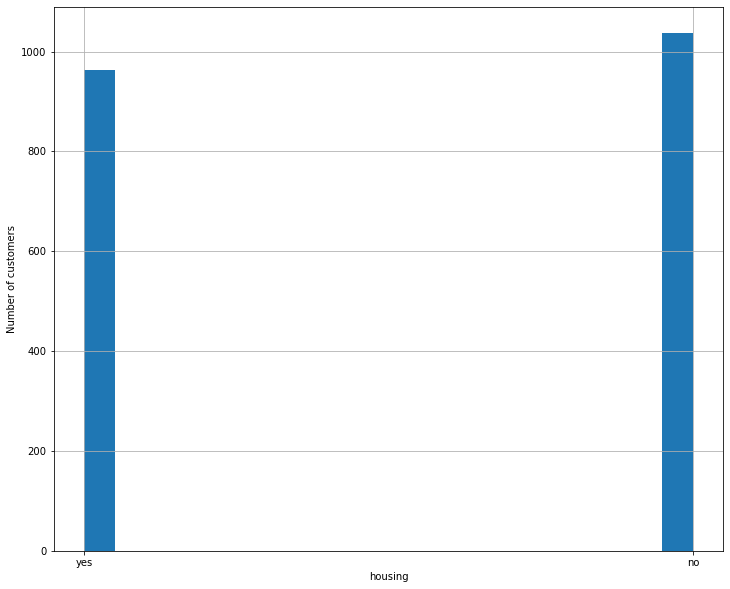

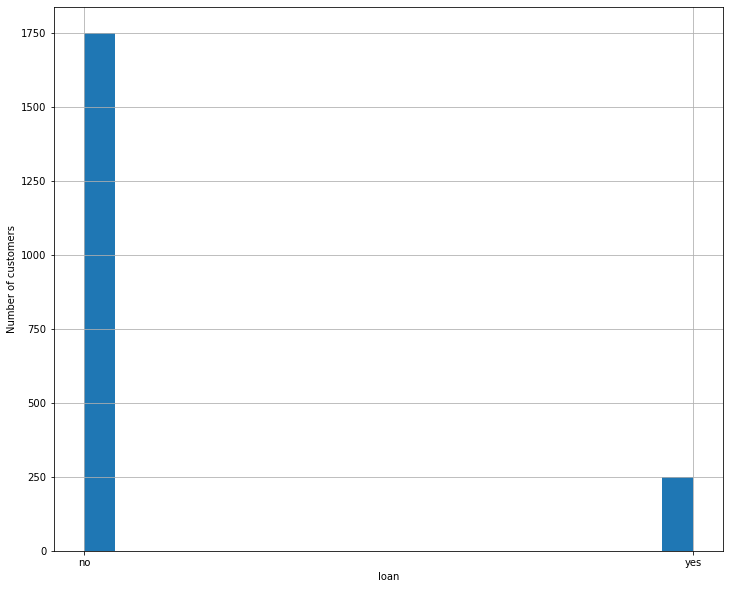

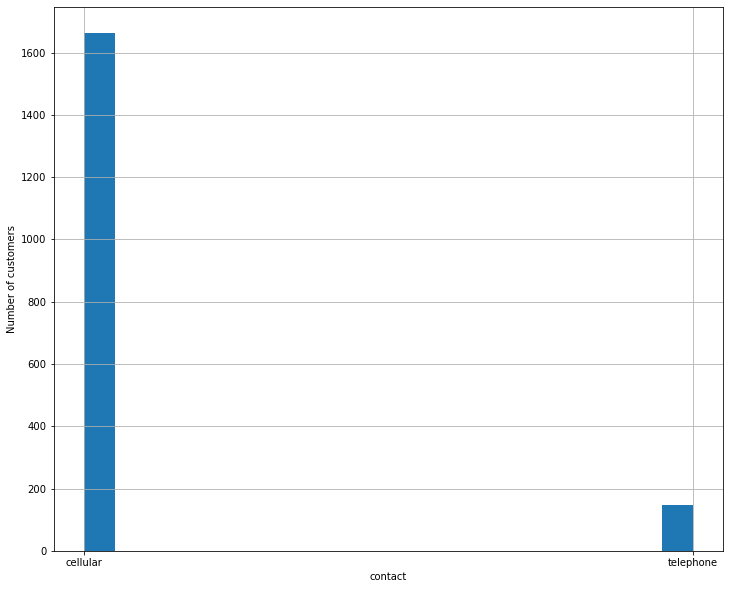

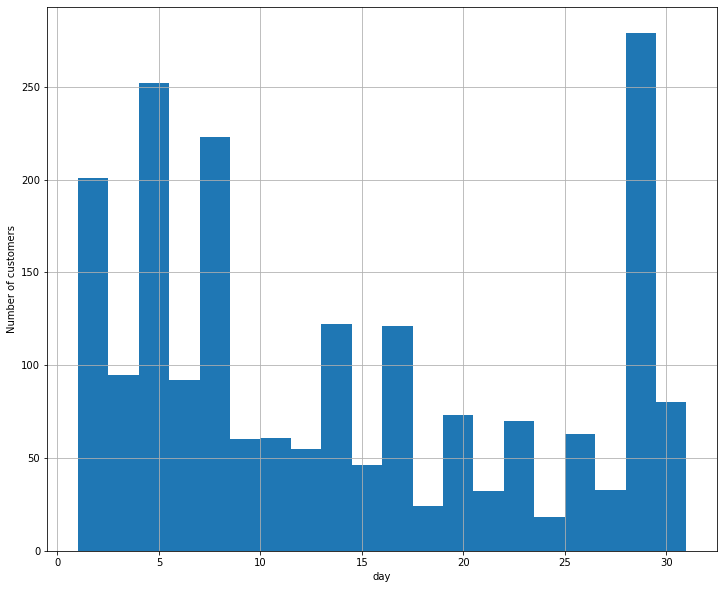

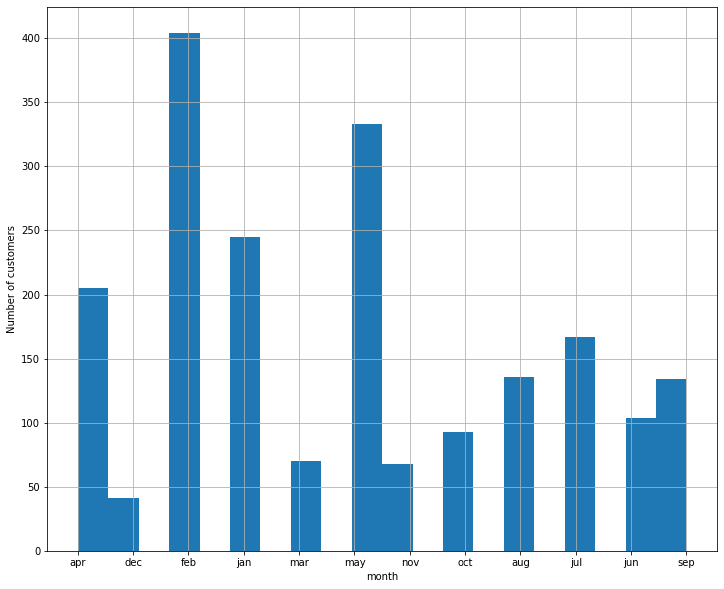

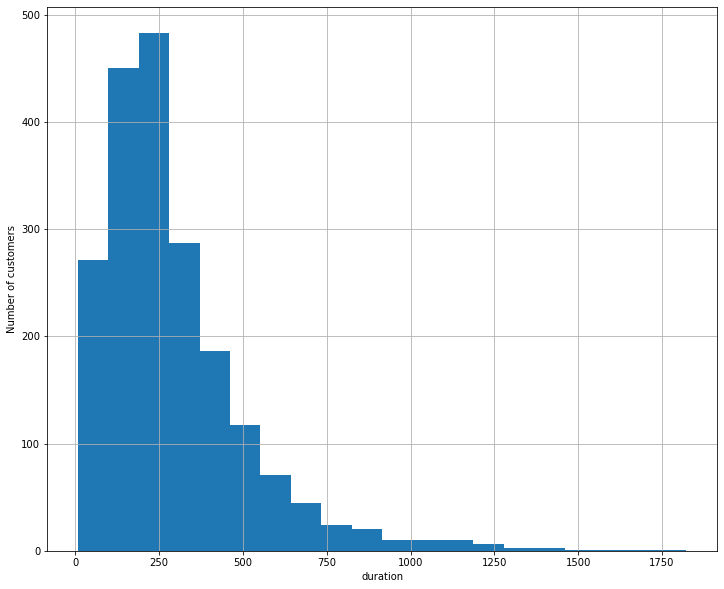

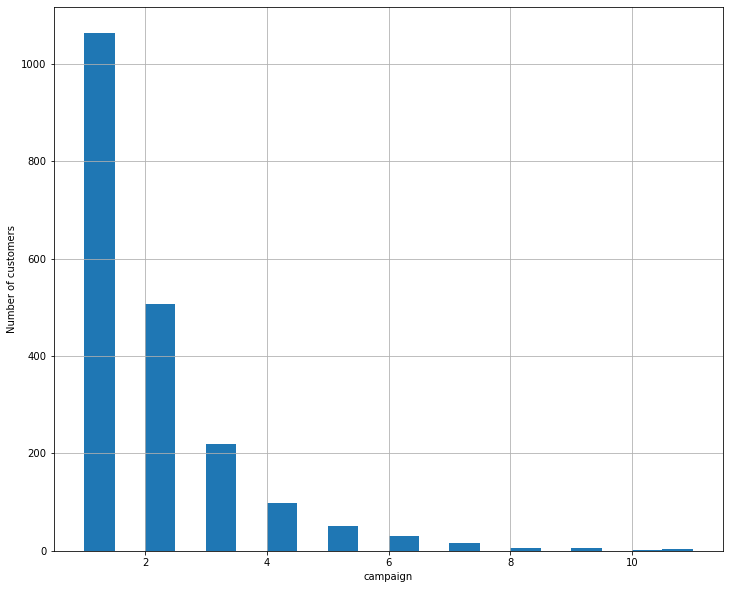

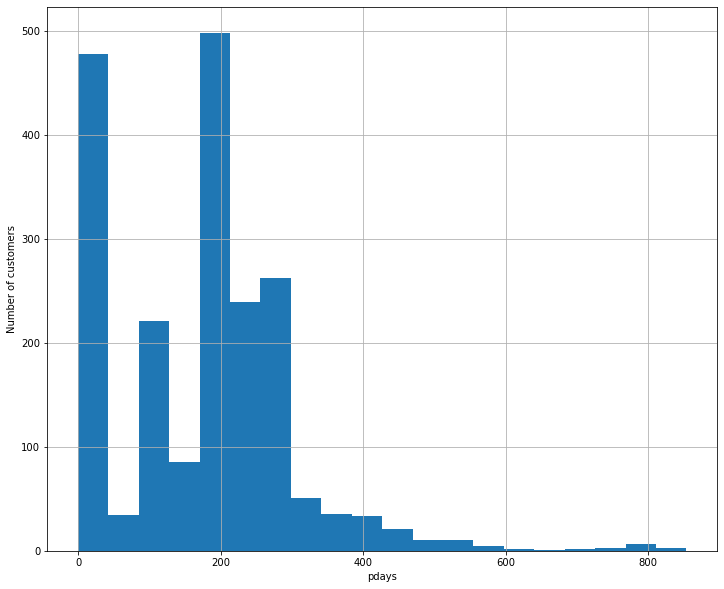

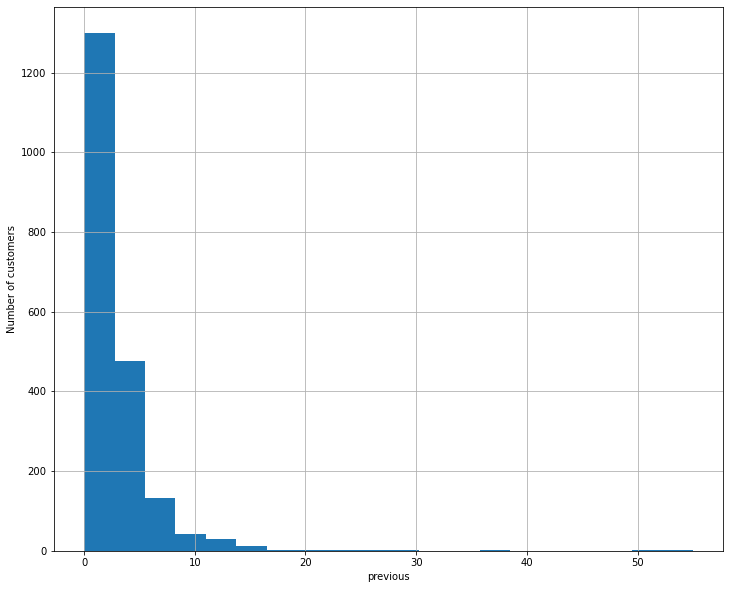

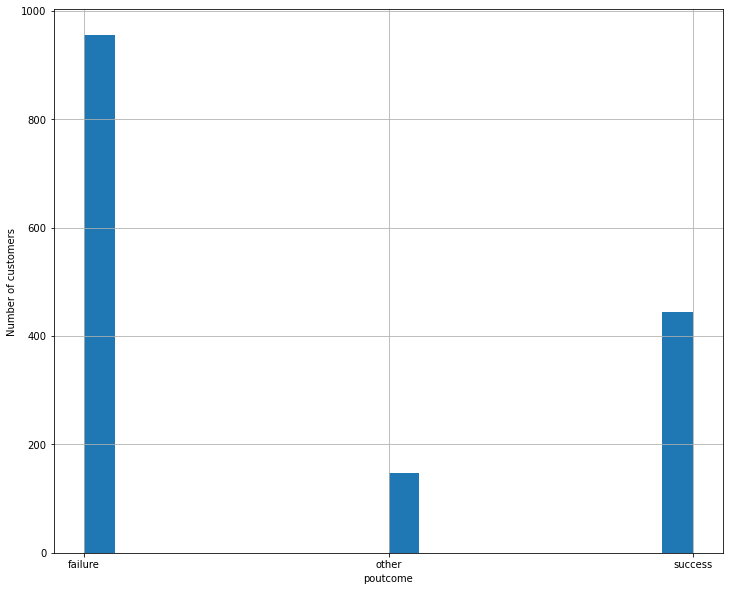

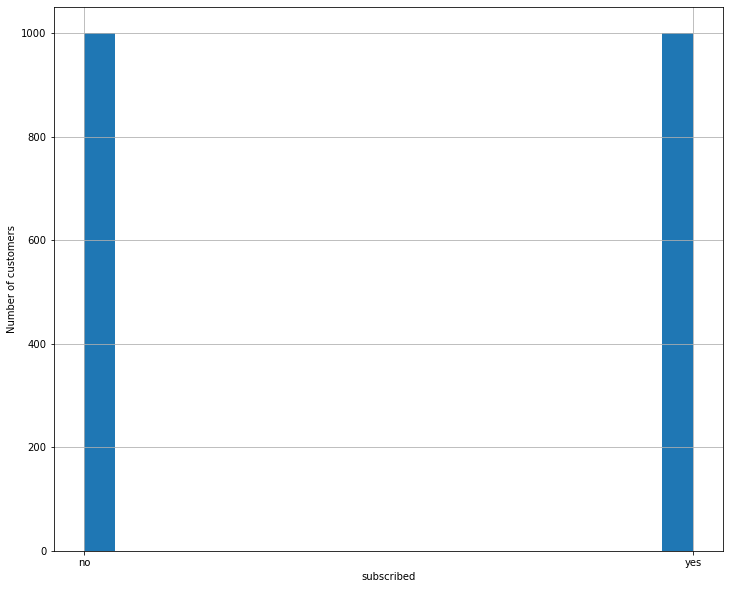

In [73]:
def histogram(dataframe,column,bincount):
    plt.figure(figsize=(12,10))
    dataframe[column].hist(bins=bincount)
    plt.xlabel(column)
    plt.ylabel('Number of customers')
    plt.show()

for (columnName, columnData) in df.iteritems():
    histogram(df,columnName,20)

## calculate the likelihood of defaulting given martial status.

In [72]:
pivot_table_LC = df.pivot_table(values='default',
                                index='marital',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 
pivot_table_LC

default
marital           
divorced  0.018605
married   0.006301
single    0.005935

## numerical and categorical attributes conclusion

From the heatmap we can see there is little correlation in the data.

There is evident skewing in the data - the age range skews younger with a preponderance of customers between 25 and 40. Balance is also skewed, this time by an outlying value of 80K which dwarfs all other balances.

The likelihood of defaulting is low across the board, but being divorced appears to increase the likelihood by 300%.

## Use at least two different plotting techniques to plot the distribution of some numerical attributes

In [ ]:
def boxplot(dataframe,column, by):
    if (by != None):
        dataframe.boxplot(column=column, by=by)
        plt.title('Box plot of {column} grouped by {by}'.format(column=column, by=by))
        plt.suptitle("")
    else:
        dataframe.boxplot(column=column)
    plt.show()

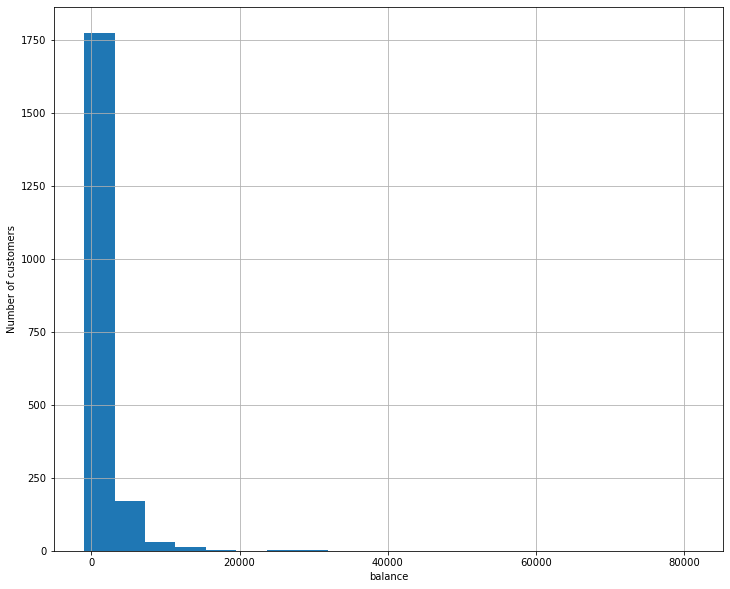

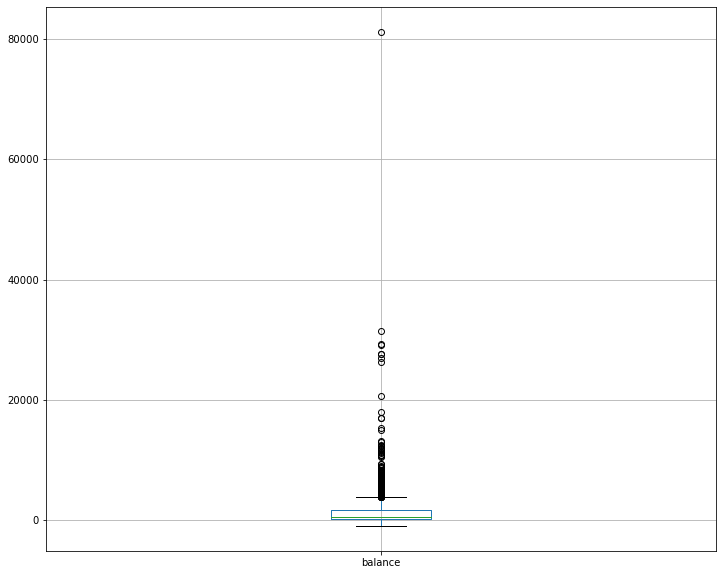

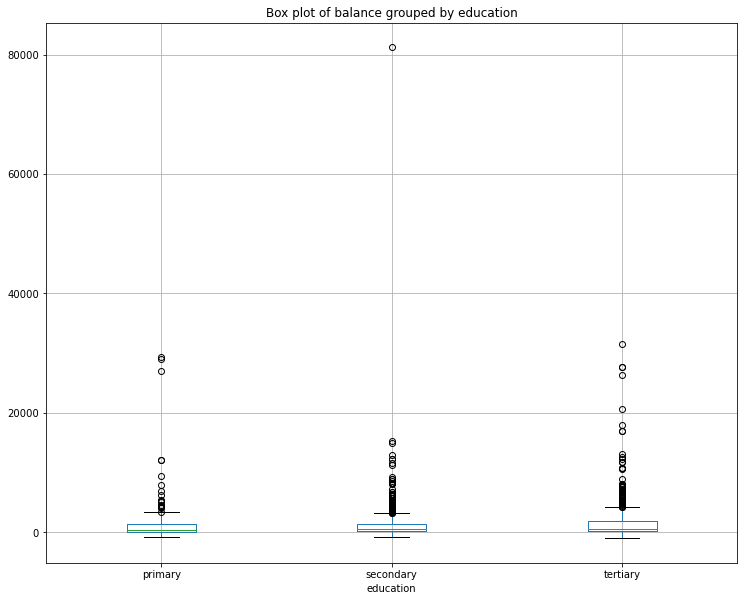

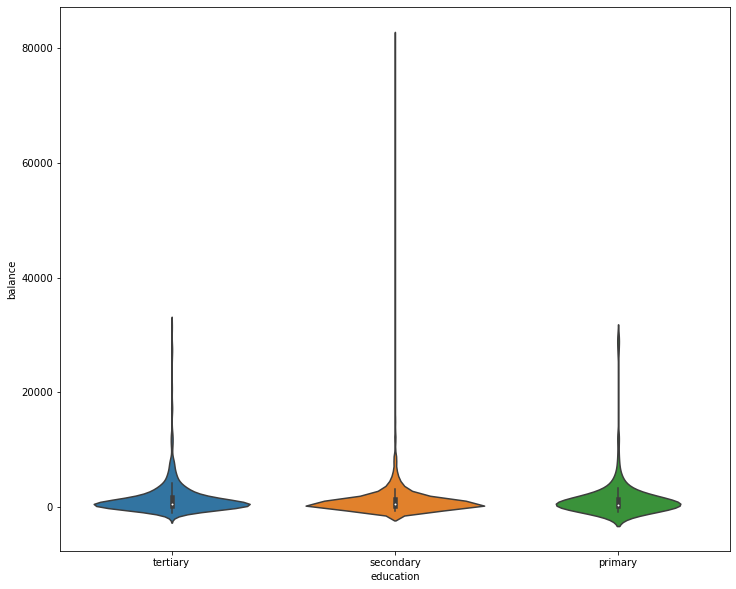

In [87]:
histogram(df,'balance',20)

boxplot(df,"balance",None)

boxplot(df,"balance","education")

sns.violinplot(data=df, x='education', y='balance')
plt.show()

## Conclusion

We can see here that balance is being skewed by at least one large value. the mean and median are quite low, but there is an obvious outlier up at 80,000. if we split it by education, we see that the means remain the same. Interestingly in this case, it appears the owner of the balance only has a secondary education. More thirdlevel graduates have higher than average balances, but there aren't that many that are noticably higher.

Here, I use pairplot to show pairware relationships between several columns. To be honest, I'm not sure how to read this data.

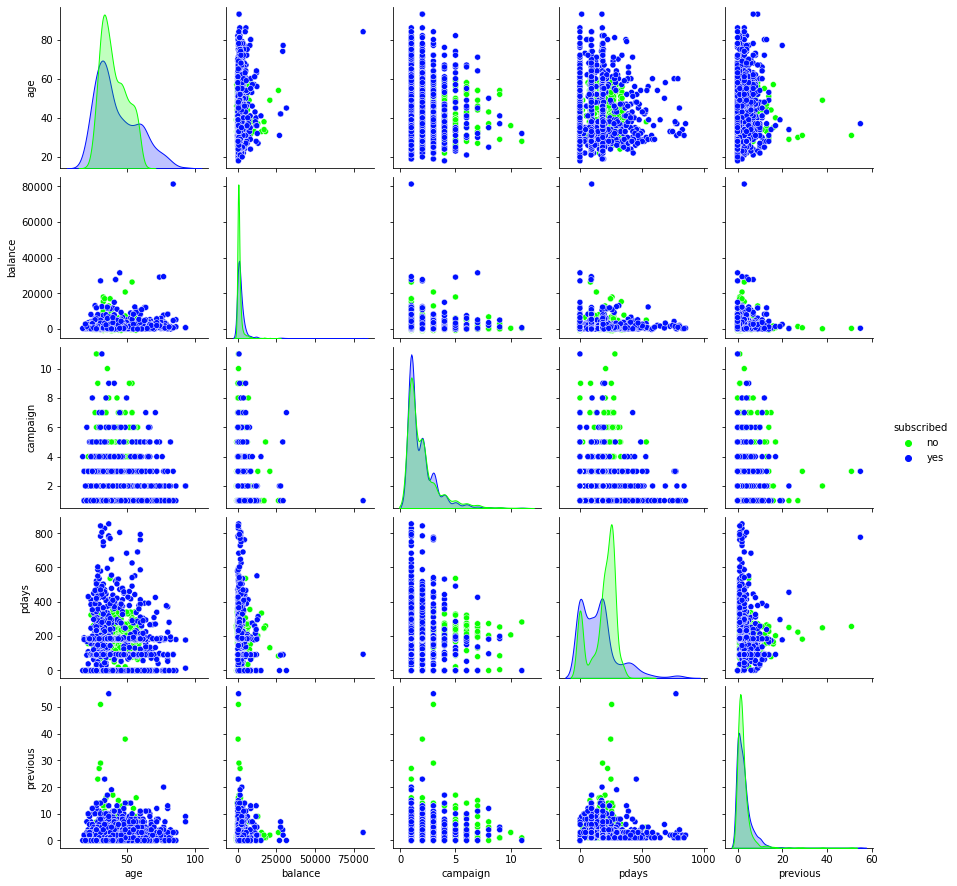

In [53]:
sns.pairplot(data=df[['age','balance','campaign','pdays','previous','subscribed']].dropna(),hue='subscribed',palette='hsv')
plt.show()

Box plots show the five-number summary of a set of data: including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score.

![boxplot](https://www.simplypsychology.org/box-whisker-plot.jpg?ezimgfmt=rs:554x307/rscb30/ng:webp/ngcb30 "boxplot")


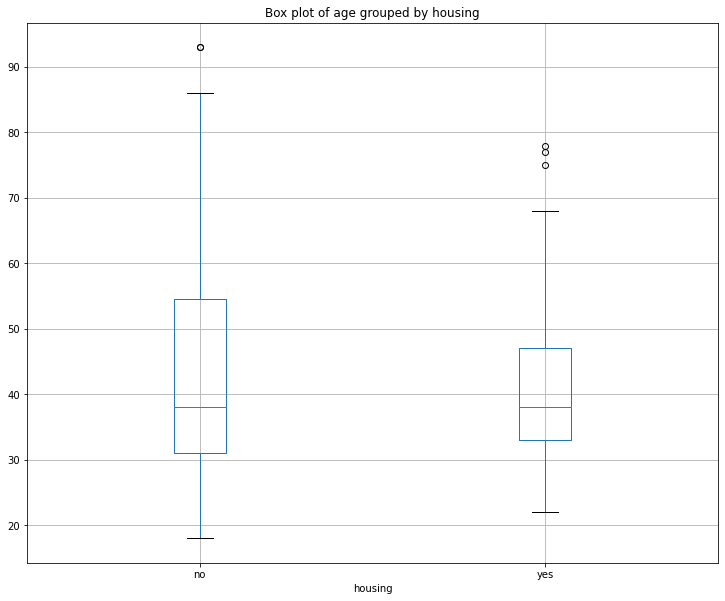

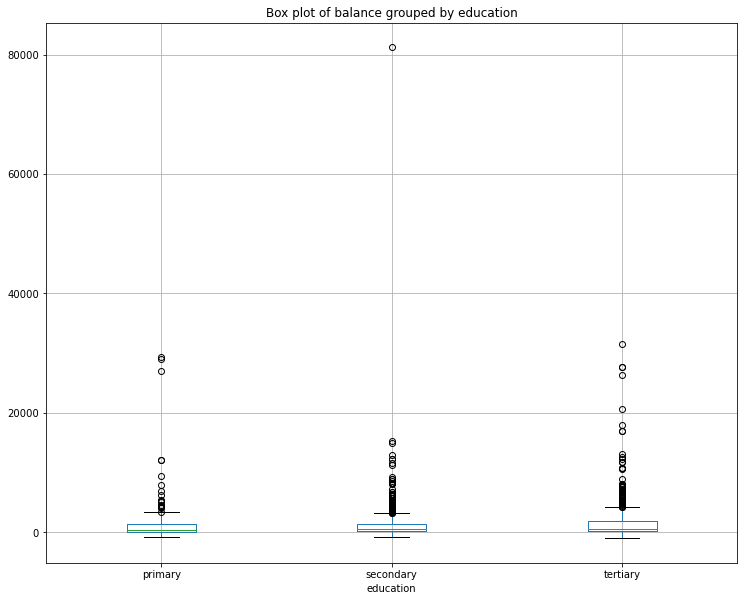

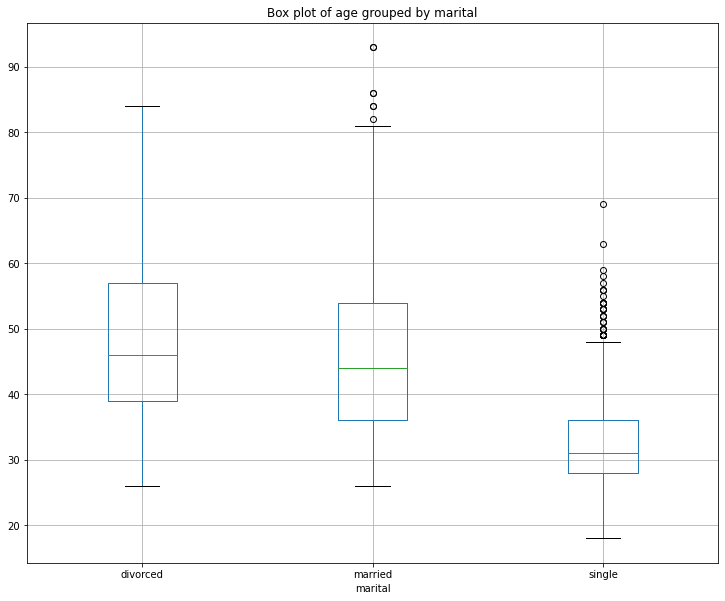

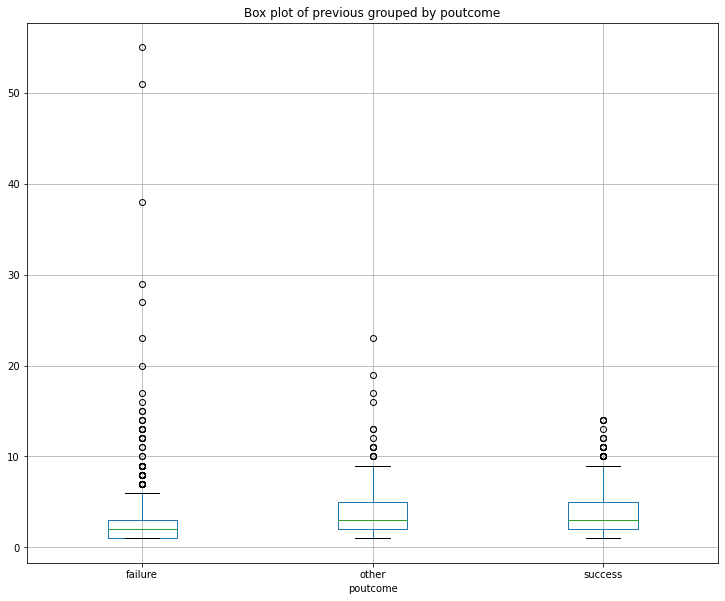

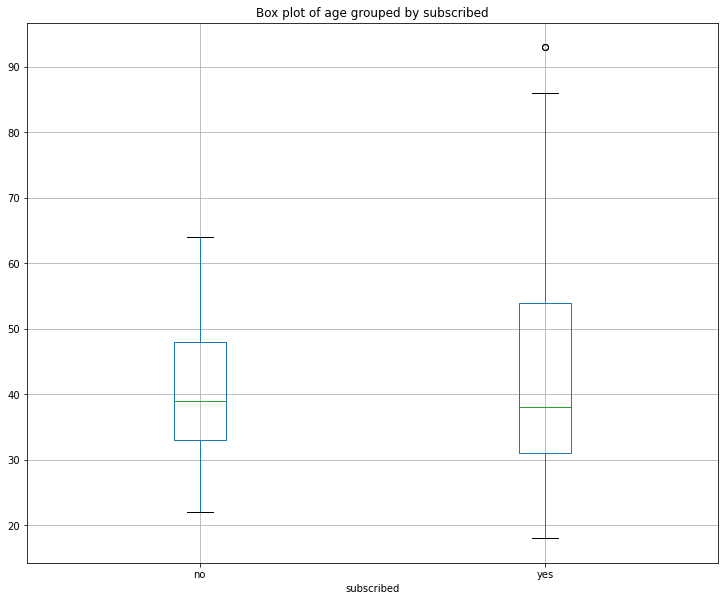

In [75]:
boxplot(df,"age","housing")
boxplot(df,"balance","education")
boxplot(df,"age","marital")
boxplot(df,"previous","poutcome")
boxplot(df,"age","subscribed")

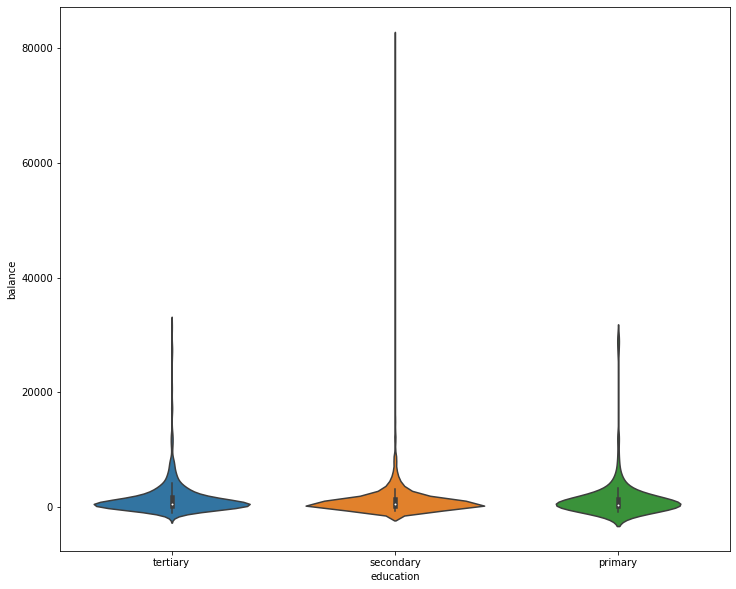

In [61]:
sns.violinplot(data=df, x='education', y='balance')
plt.show()

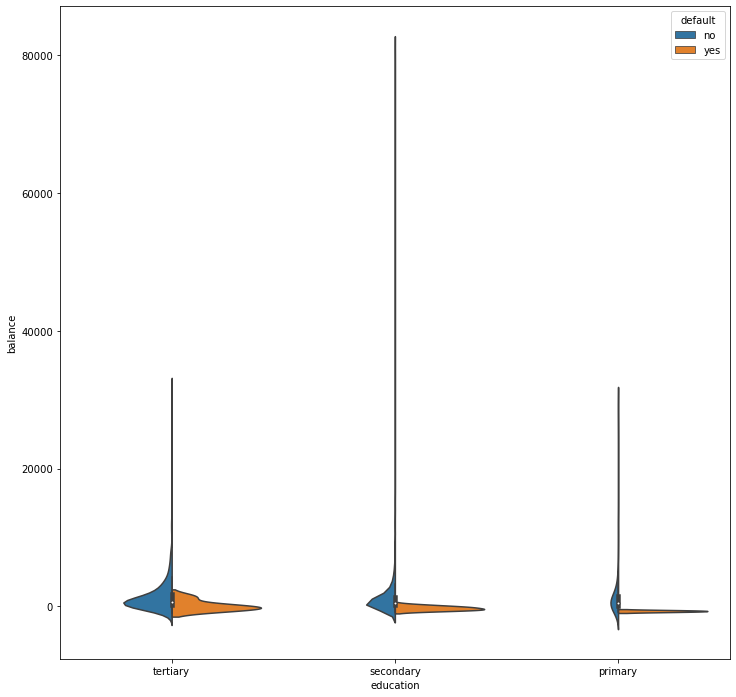

In [63]:

sns.violinplot(data=df, x='education', y='balance', hue='default', split=True)
plt.show()

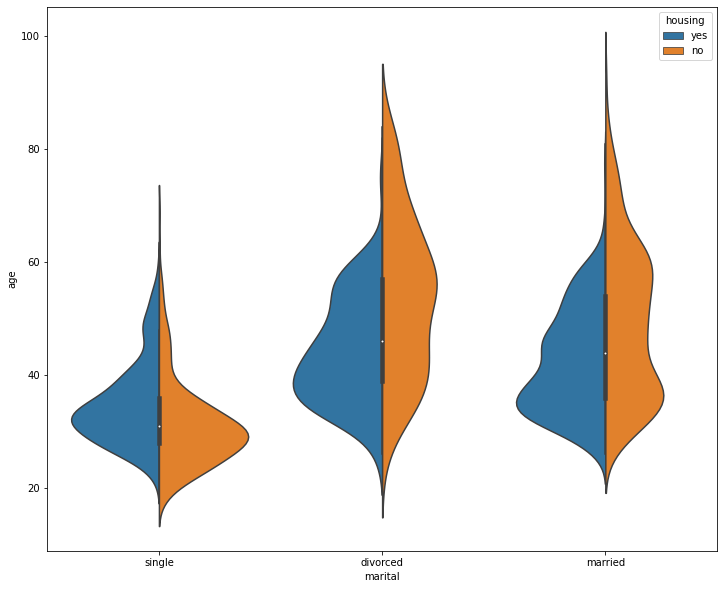

In [79]:
sns.violinplot(data=df, x='marital', y='age', hue='housing', split=True)
plt.show()

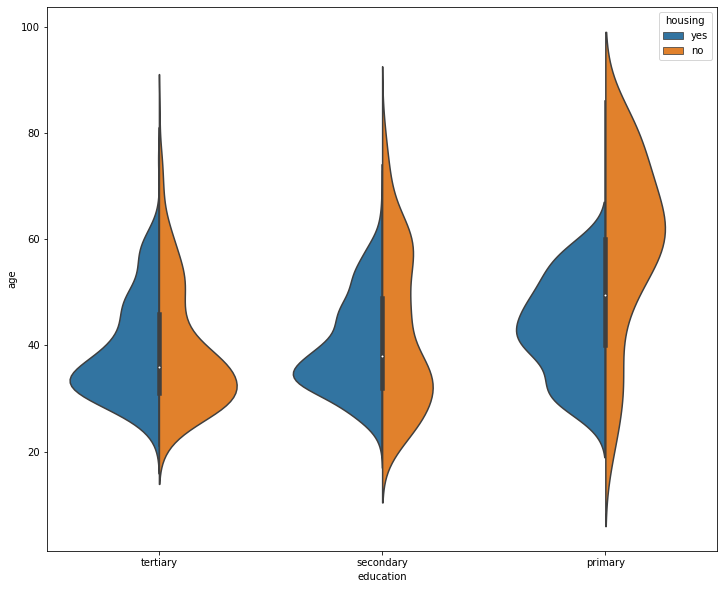

In [78]:
sns.violinplot(data=df, x='education', y='age', hue='housing', split=True)
plt.show()

## Generate two plots with the combined distribution of attributes and draw conclusions from them

In [46]:
def stacked_bar_chart(dataframe,primary,secondary):
    
    crosstab_CL = pd.crosstab(dataframe[primary], dataframe[secondary])
    #plt.figure(figsize=(12,10))
    crosstab_CL.plot(kind='bar', stacked=True, colormap='Paired')
    plt.title("{primary}, grouped by {secondary}".format(primary=primary, secondary=secondary))
    plt.ylabel('Number of Applicants')
    plt.show()

   

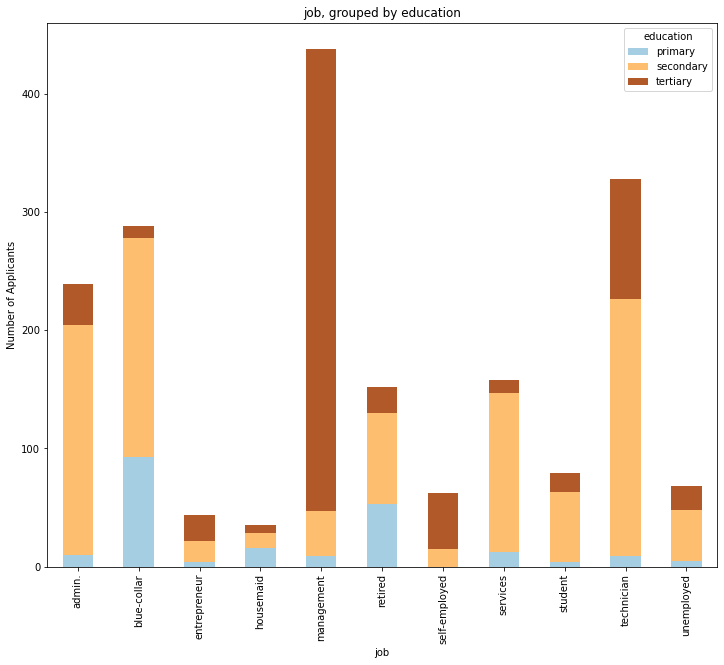

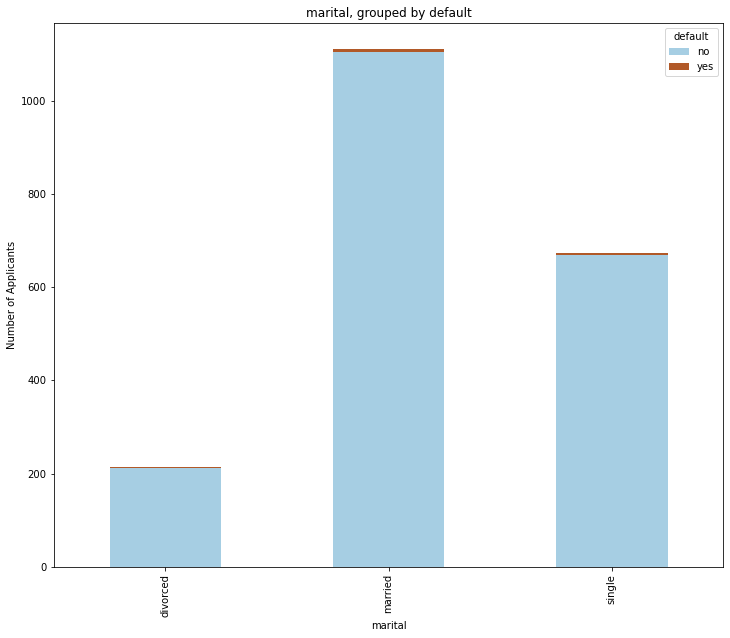

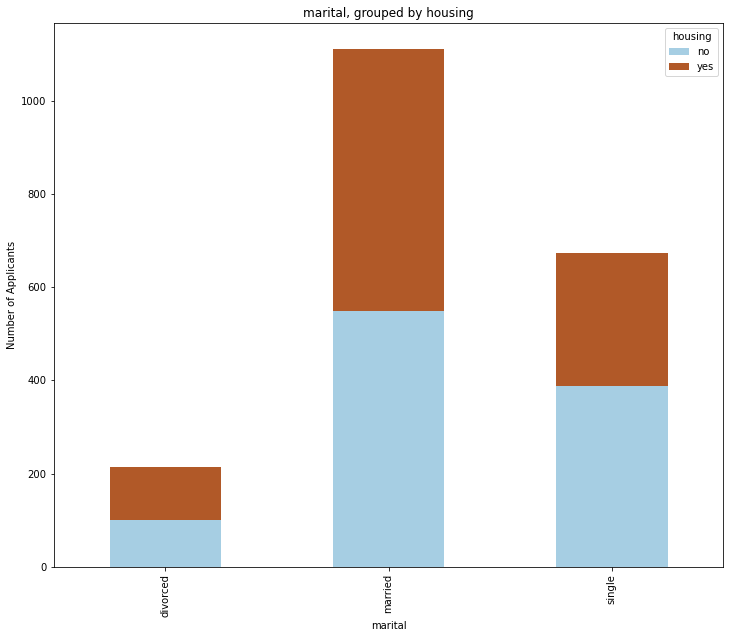

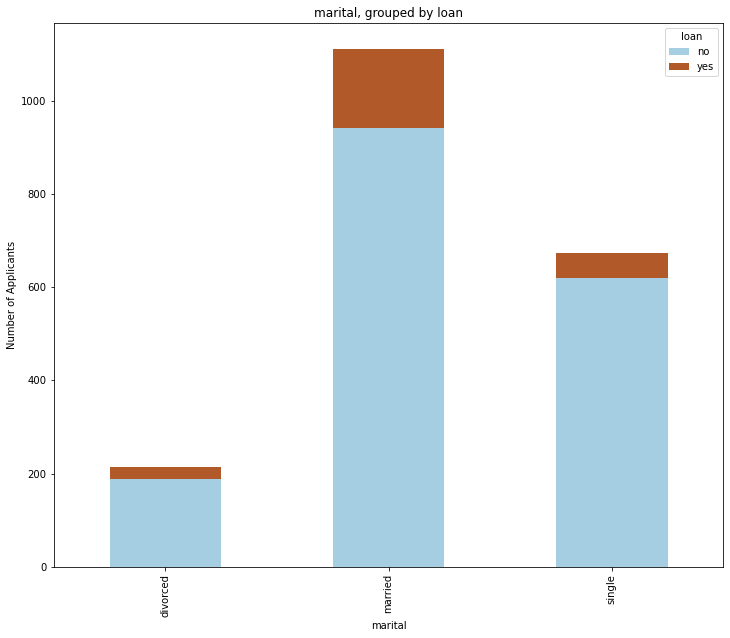

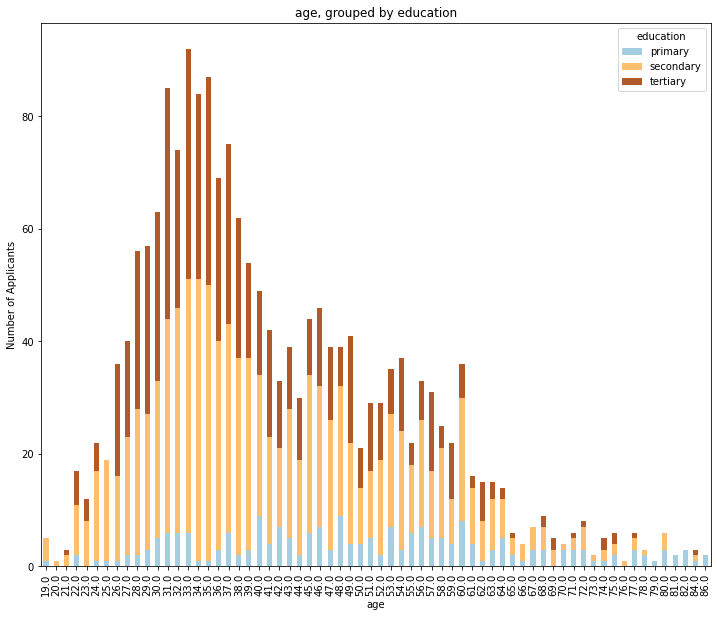

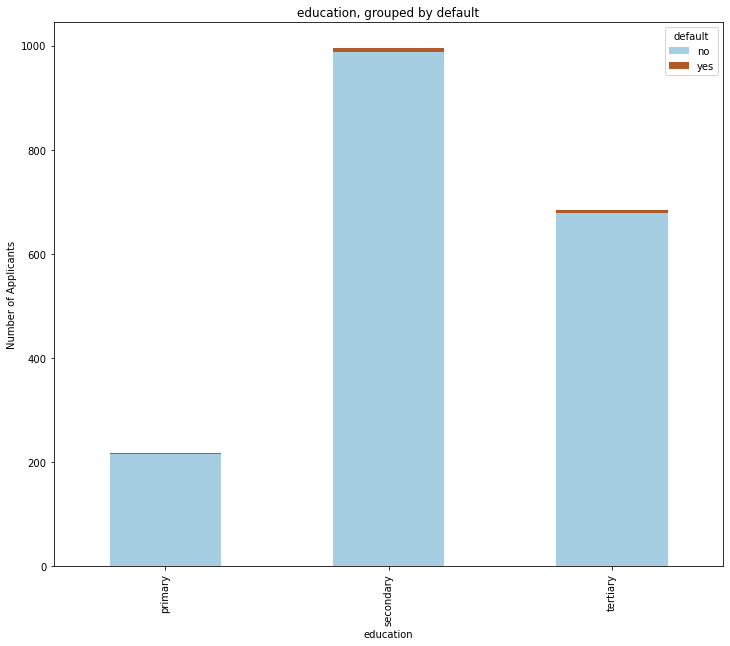

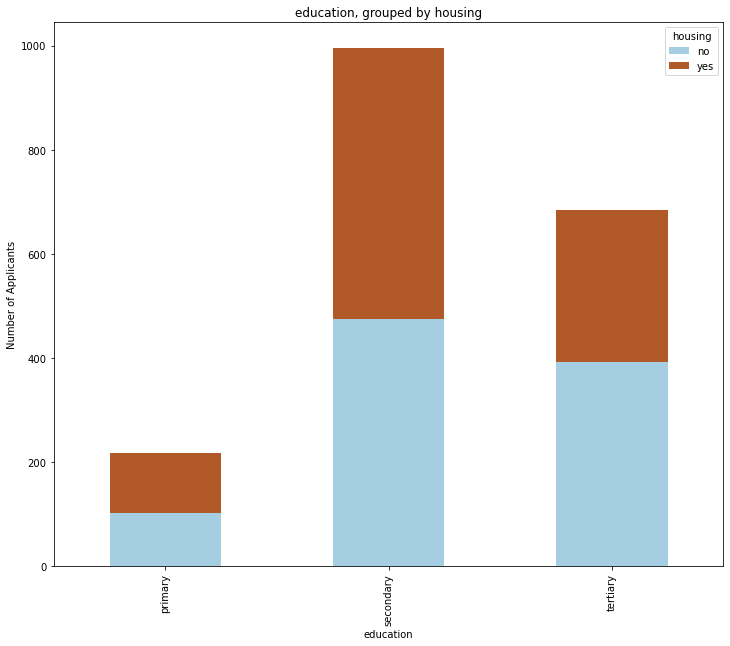

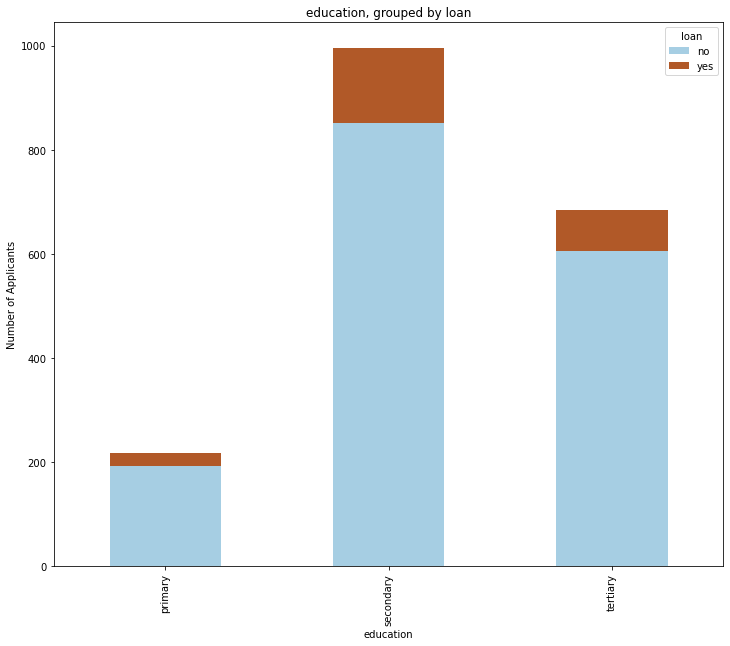

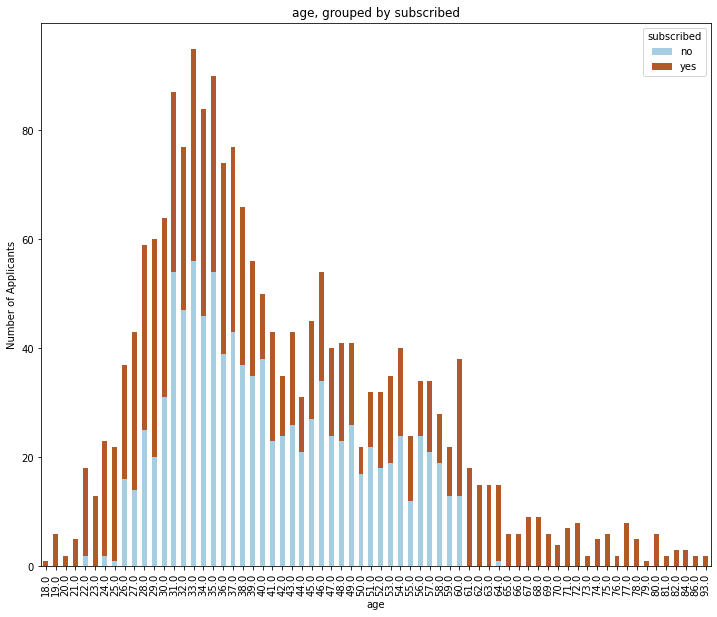

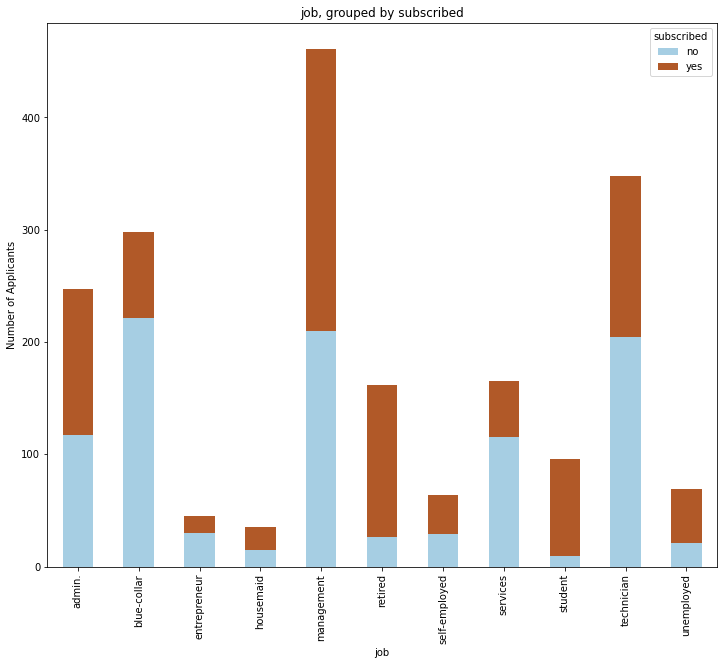

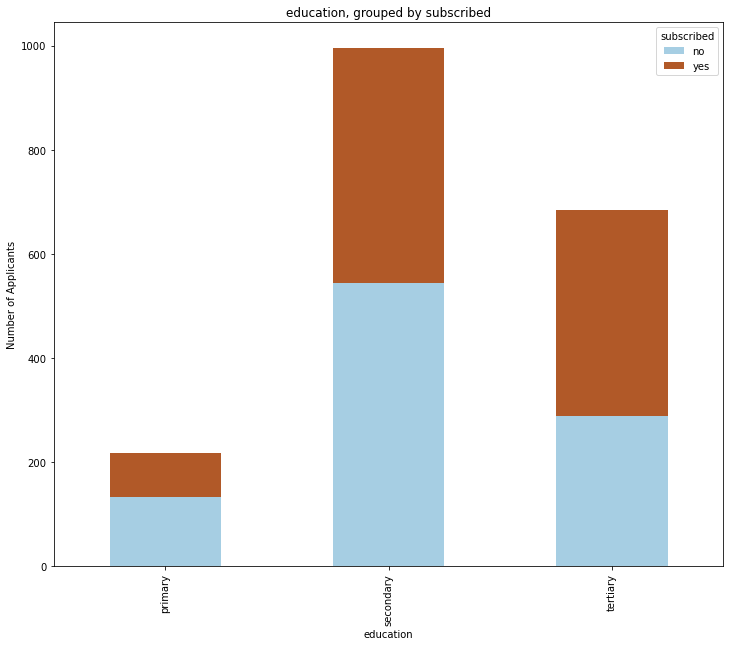

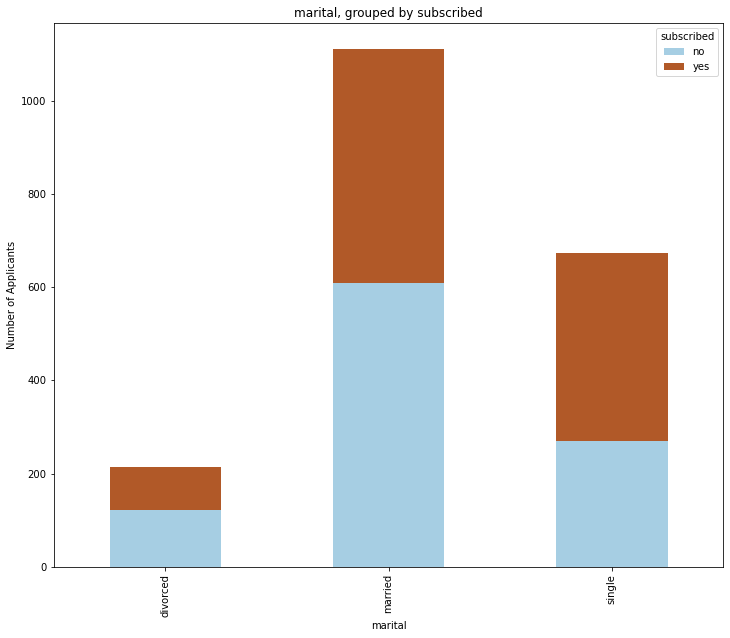

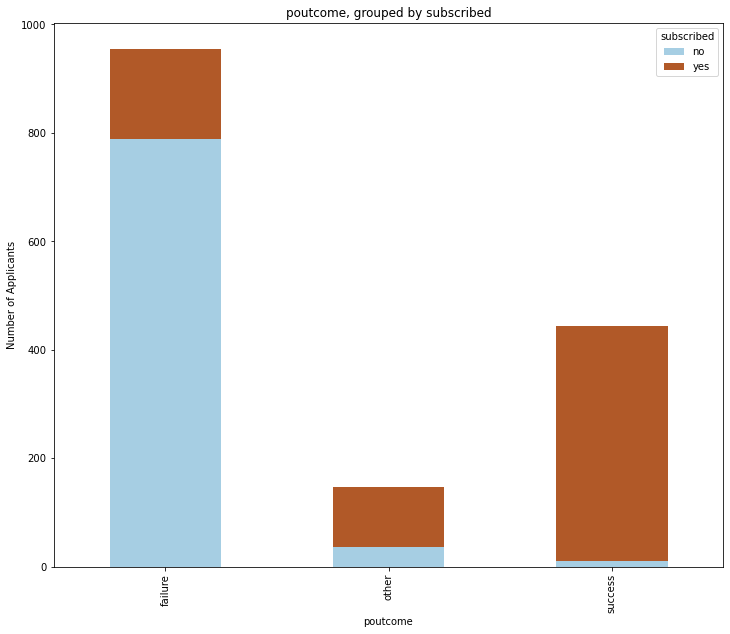

In [90]:
stacked_bar_chart(df,'job','education')
stacked_bar_chart(df,'marital','default')
stacked_bar_chart(df,'marital','housing')
stacked_bar_chart(df,'marital','loan')
stacked_bar_chart(df,'age','education')
stacked_bar_chart(df,'education','default')
stacked_bar_chart(df,'education','housing')
stacked_bar_chart(df,'education','loan')
stacked_bar_chart(df,'age','subscribed')
stacked_bar_chart(df,'job','subscribed')
stacked_bar_chart(df,'education','subscribed')
stacked_bar_chart(df,'marital','subscribed')
stacked_bar_chart(df,'poutcome','subscribed')

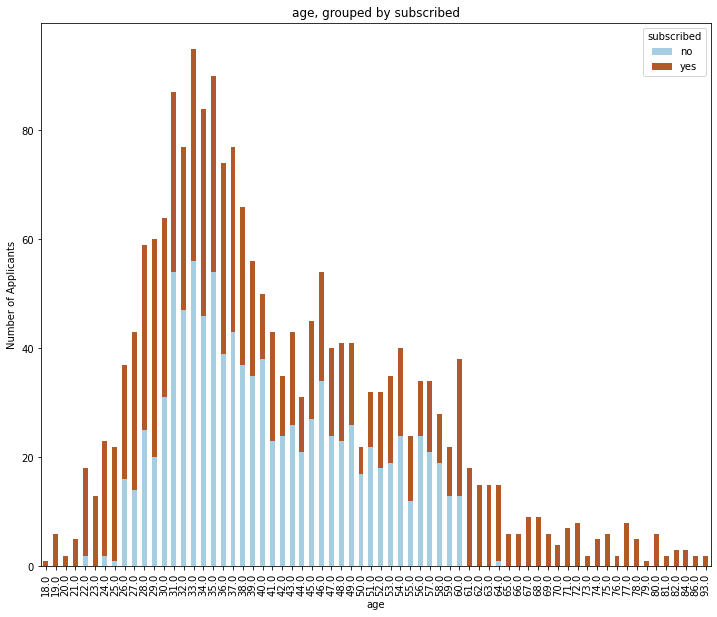

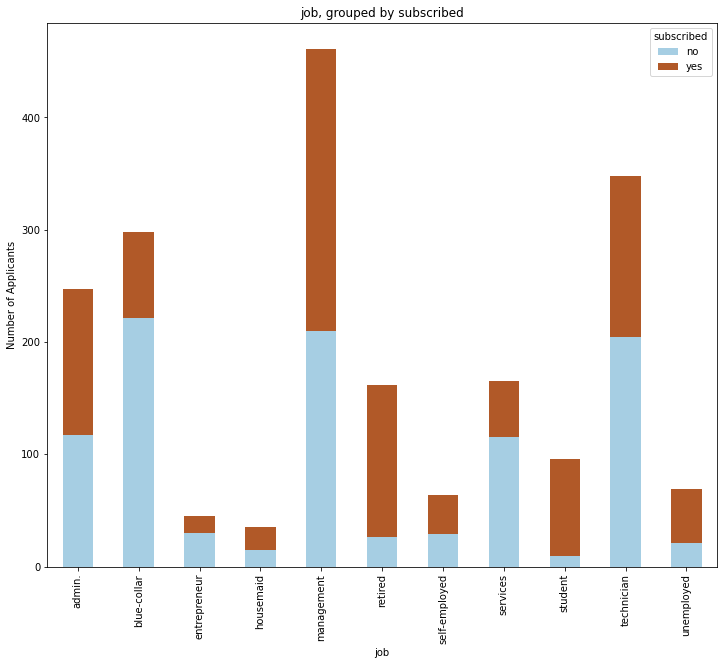

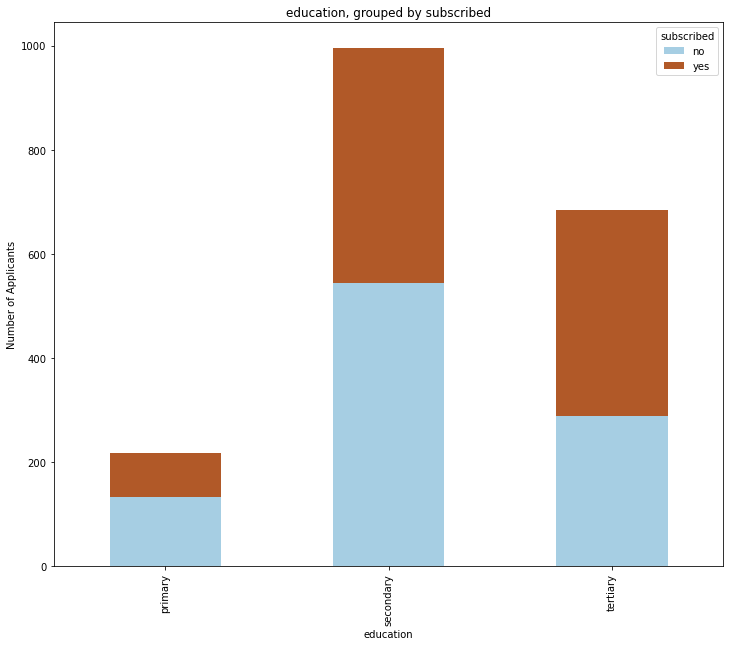

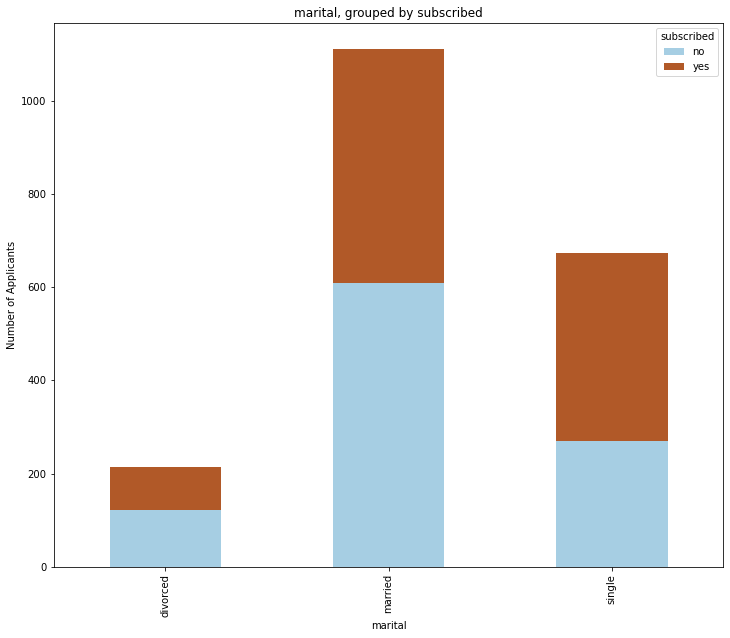

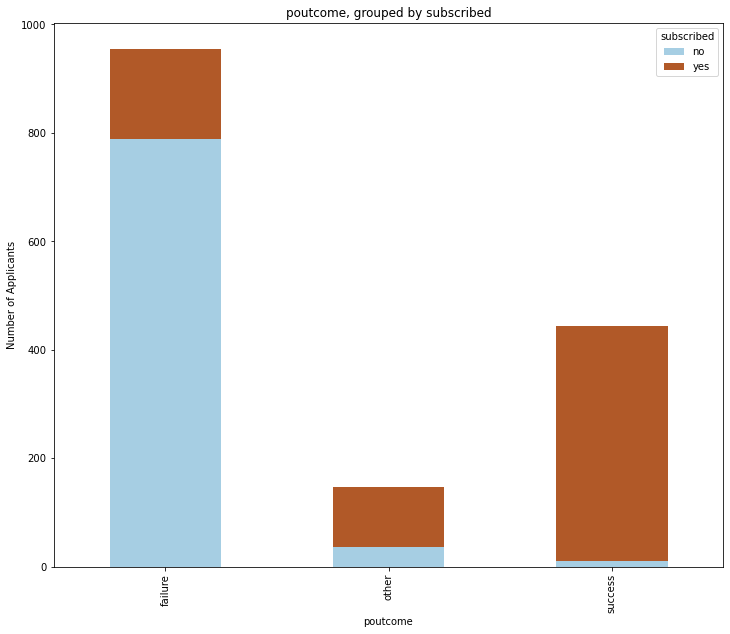

# Conclusion

* A lot of people in management have a third level education
* You're more likely to have a house loan if you're married.
* management, technical, admin and retirees are the most likey to subscribe
* having a home loan doesn't seem to be affected by education. Approximately 50% of customers have a home loan for each education category.
* If you've over 60, it's very likely you'll subscribe.

So, from these graphs above, for the question "Given the data at hand, who would it be best to target the marketing campaign towards to get the best outcome?" 

* retired people
* graduates in management technical or admin
* those who have previously subscribed.